##### Order of Operation
1. import
2. read in training data 
3. clean data 
4. stem words with snowball stemmer
5. pipeline tfidf vectorizer, [selected classifier]
6. choose best pipeline
7. gridsearchcv on pipeline to find best tuned classifier
8. test on other data i.e. Kaggle, friends, etc...

## Introduction
In this project, I try to optimize a supervised machine learning algorithm to predict Myers-Briggs personality profiles of Kaggle forum users based on the [(MBTI) Myers-Briggs Personality Type Dataset](https://www.kaggle.com/datasnaek/mbti-type) on Kaggle. 

This notebook was forked from [this](https://www.kaggle.com/lbronchal/what-s-the-personality-of-kaggle-users) Kaggle kernel. 

In [8]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

In [9]:
train_data = pd.read_csv('../mbti-project/mbti_1.csv')
user_data = pd.read_csv('../mbti-project/Users.csv')
forum_data = pd.read_csv('../mbti-project/ForumMessages.csv')
mbti = {'I':'Introversion', 'E':'Extroversion', 'N':'Intuition', 
        'S':'Sensing', 'T':'Thinking', 'F': 'Feeling', 
        'J':'Judging', 'P': 'Perceiving'}

Let's look at the structure of the dataset.

In [13]:
train.shape

(8675, 2)

Let's look at the distribution of personality profile types in the training data.

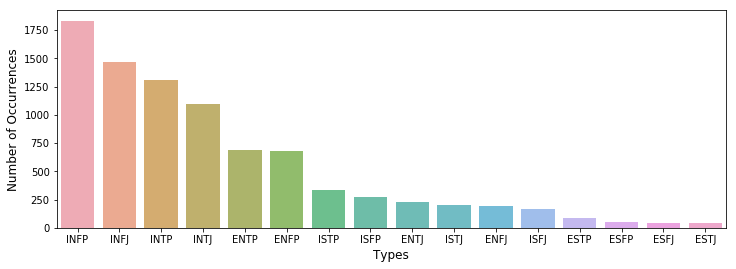

In [11]:
type_count = train['type'].value_counts()

plt.figure(figsize=(12,4))
sns.barplot(type_count.index, type_count.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.show()

Let's see if there are missing values in our data. 

In [24]:
print('Forum Missing Values:')
print(forum_data.isnull().sum())
print('\n')
print('User Missing Values:')
print(user_data.isnull().sum())
print('\n')
print('Training Missing Values:')
print(train_data.isnull().sum())

Forum Missing Values
Id                           0
ForumTopicId                 0
AuthorUserId                 0
PostDate                     0
Message                    581
ReplyToForumMessageId    70620
TopicMessagePosition         0
RawMarkdown              60694
Score                        0
FlaggedCount                 0
dtype: int64


User Missing Values
Id                     0
UserName          267200
DisplayName           21
RegisterDate           0
Points            510138
Ranking           510138
Tier                   0
HighestRanking    510132
dtype: int64


Training Missing Values
type     0
posts    0
dtype: int64
